In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [22]:
file = 'sample_data.xlsx'

# read in data, 
# remove white space fron some of the column names,
# put all column names to lowercase,
# and then order by date

df = pd.read_excel(file).rename(columns=lambda x: x.strip()).rename(str.lower, axis = 'columns').sort_values(by = ['date'])

# Making a new variable to represent the week of year
# and the month of the transactions
df['week_of_year'] = df.date.dt.week - 23
    # Subtract 23 to make the first week I moved to CLT week 1
df['month'] = df['date'].dt.strftime("%b")

### Rearranging the order of the columns ###
cols = df.columns.tolist()
cols = cols[0:2] + cols[-2:] + cols[2:-2]
df = df[cols]


In [23]:
df.head()

,date,amount,week_of_year,month,description,where
0,2019-06-10,-88.53,1,Jun,Grocries,Publix
1,2019-06-10,-22.85,1,Jun,Grocries,Food Lion
2,2019-06-10,-85.40,1,Jun,Clothes,Nike
3,2019-06-10,-143.42,1,Jun,Dining,Firehouse Subs
4,2019-06-10,-135.67,1,Jun,Clothes,Polo


In [28]:
class Monthly_Spending:
    '''
    Monthlty Statement: Class that gives a quick overview of my monetary transactions.
  ________________________________________________________________________________________________________________
    
    Input:
        df: A pandas DataFrame read in from excel spread sheet
        
        week_of_interest = latest week from dataframe: Week in which we would like summary statistics of expenditure    
  ________________________________________________________________________________________________________________

    Output:
    
        VARIABLES:    
        
        average_weekly_expenditure: Average of each weeks expenditure. type() = numpy.float64
            POSSIBLE: Rewritten to use the weekly_tots variable?
            
        earn_n_burn: Each weeks sum of either money earned or spent. type() = pandas.DataFrame
        
        weekly_earn: Each weeks sum of money earned. type() = type() = pandas.core.series.Series
        
        weekly_burn: Each weeks sum of money spent. type() = type() = pandas.core.series.Series
        
        monthly_earn_n_burn: Each months sum of either money earned or spent. type() = pandas.DataFrame
        
        monthly_earn: Each months sum of money earned. type() = type() = pandas.core.series.Series
                
        monthly_burn: Each months sum of money spent. type() = type() = pandas.core.series.Series
        
        monthly_tots: Each months sum of purchases. type() = pandas.core.series.Series
        
        weekly_tots: Each weeks sum of purchases. type() = pandas.core.series.Series
        
        FUNCTIONS():
        
        weekly_bar_plot: Barplot showing the gross expenditures per week. Horizontal line represents the average 
            weekly expenditure
            
        monthly_bar_plot: monthly_bar_plot: Barplot of either monthly earnings (default) or monthly spending. 
        
        this_weeks_purchases(week = latest week): Complete list for week of interest purchases. 
            type() = pandas.core.frame.DataFrame
        
        week_spend(week = latest week): Gross expenditure for week of interest. type() = numpy.float64
            
        week_pivot_table: Pivot table summazring where money was spent for week of interest
            type() = pandas.core.frame.DataFrame
            
        year_pivot_table: Pivot table summazring where money was spent for each month
            type() = pandas.core.frame.DataFrame            
    
    '''
    
    def __init__(self, df, week_of_interest = df.week_of_year.max()):
        self.df = df
        self.week_of_interest = week_of_interest
        
    def __str__(self):
        
        return "This week you earned ${}".format(self.weekly_spend())
        
    
  ################################################################################################################
  ######################################### # # # # # # # # # # #  ###############################################    
  ######################################### USER DEFINED VARIABLES ###############################################
  ######################################### # # # # # # # # # # #  ###############################################
  ################################################################################################################
    
                                          #########################
                                          ### Weekly Statistics ###
                                          #########################
    
    average_weekly_expenditure = round(round(df.groupby(df.week_of_year)['amount'].sum().mean(), 5), 2)
        #note that we rounded twice in this variable assignment to make sure we are accurate to the $0.001
        # we can most likely delete this variable, it's not used nor does it contain any valueable information
        
    earn_n_burn = df.groupby(['week_of_year', df['amount'] < 0])['amount'].sum().unstack()
    
    weekly_earn = earn_n_burn[0].fillna(0)
        # the sum of all money earned since data began to be collected
    
    weekly_burn = earn_n_burn[1]
        # the sum of all money spent since data began to be collected
    
    weekly_tots = round(round(df.groupby(df.week_of_year)['amount'].sum(), 5), 2)
        # the aggregate of money either earned or burned for each given week
        
                                          ##########################
                                          ### Monthly Statistics ###
                                          ##########################
    
    monthly_earn_n_burn = df.groupby(['month', df['amount'] < 0])['amount'].sum().unstack().sort_values(by = ['month']).fillna(0)
        # Need to fill NaN's or the monthly earn chart does not work #BUG
            ####
    ## DF is orderd strangely ##
    ## Causes Weird Order of ##
    ##      FIX THIS         ## 
            ####
    
    monthly_earn = monthly_earn_n_burn[0]
    
    monthly_burn = monthly_earn_n_burn[1]
       
    monthly_tots = round(round(df.groupby(df.month)['amount'].sum(), 5), 2)
        # the aggregate of money either earned or burned for each given month
    
    
                                          ##########################
                                          ###     Functions      ###
                                          ##########################
    
    def weekly_spend(self, week = None):
        '''
        week_spend(week): Gross expenditure for week of interest. type() = numpy.float64
        NOTE: by defualt this function outputs the gross expenditure passsed in the week_of_interest (by defualt the 
        latest week). If you would like another week and not change the week_of_interest you can simply past that week 
        number in the week argument for this function.        
        '''
        if week is None:
            week = self.week_of_interest
        return round(df[df.week_of_year == week].sum()[0], 2)
    
    def this_weeks_purchases(self, week = None):
        '''
        this_weeks_purchases(week): Complete list for week of interest purchases. type() = pandas.core.frame.DataFrame
        NOTE: by defualt this function outputs the list of purchases for the week_of_interest (by defualt the 
        latest week). If you would like another week and not change the week_of_interest you can simply past that week 
        number in the week argument for this function.
        '''
        if week is None:
            week = self.week_of_interest
        return df[df.week_of_year == week]
    
    def weekly_bar_plot(self):
        ax = sns.barplot(x = self.weekly_burn.index, y = self.weekly_burn.values)
        ax.axhline(self.weekly_burn.mean(), ls = "--", color = 'r') 
        ax.set(xlabel = 'Week', ylabel = 'Gross Expenditure ($)')
        plt.gca().invert_yaxis()
        plt.show()   
        
    def monthly_bar_plot(self, earn_or_burn = 'earn'):
        '''
        monthly_bar_plot: Barplot of either monthly earnings (default) or monthly spending 
        Input:
            earn_or_burn = 'earn' | 'burn'
        '''
        if earn_or_burn == 'earn':
            ax = sns.barplot(x = self.monthly_earn.index, y = self.monthly_earn.values)
            ax.axhline(0, ls = "-", color = 'black') 
            ax.set(xlabel = 'Month', ylabel = 'Gross Earn ($)')
            # add values above chart
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.2f'), (p.get_x()+ p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            plt.ylim(top = self.monthly_earn.values.max() + 1500)
            plt.show()
            
        elif earn_or_burn == 'burn':
            ax = sns.barplot(x = self.monthly_burn.index, y = self.monthly_burn.values)
            ax.axhline(0, ls = "-", color = 'black') 
            ax.set(xlabel = 'Month', ylabel = 'Gross Spent ($)')
            plt.gca().invert_yaxis()
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.2f'), (p.get_x()+ p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            plt.ylim(top = self.monthly_burn.min() - 500)
            plt.show()
            
        else:
            raise ValueError('Plotting Value must be either "earn" (default) or "burn"')   
        
    def week_pivot_table(self, week = None):
        if week is None:
            week = self.week_of_interest
        return pd.pivot_table(self.df[df.week_of_year == week], values = 'amount', columns = 'description', aggfunc=np.sum)
    
    def year_pivot_table(self):
        return pd.pivot_table(self.df, values = 'amount', index = 'month', columns = 'description', aggfunc=np.sum)

In [29]:
example = Monthly_Spending(df)
print(example)

This week you earned $1963.44


In [31]:
example.monthly_earn_n_burn

amount,False,True
month,,
Aug,2000.0,-555.13
Jul,2000.0,-6959.52
Jun,2000.0,-2267.21


In [47]:
#spending.year_pivot_table()
example.week_pivot_table()

description,Bills,Paycheck
amount,-36.56,2000.0


In [46]:
example.year_pivot_table()

description,Bills,Clothes,Dining,Grocries,Paycheck
month,,,,,
Aug,-192.61,-13.23,-66.94,-282.35,2000.0
Jul,-1329.60,-1117.50,-2882.77,-1629.65,2000.0
Jun,-204.40,-734.30,-837.36,-491.15,2000.0


In [45]:
example.weekly_burn

week_of_year
1   -1024.09
2    -940.68
3    -302.44
4   -1689.71
5   -1613.24
6   -1415.34
7   -1179.63
8   -1580.17
9     -36.56
Name: True, dtype: float64

In [36]:
example.weekly_earn

week_of_year
1    2000.0
2       0.0
3       0.0
4       0.0
5    2000.0
6       0.0
7       0.0
8       0.0
9    2000.0
dtype: float64

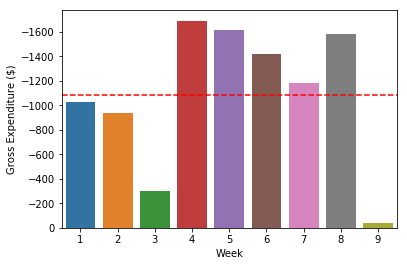

In [38]:
example.weekly_bar_plot()

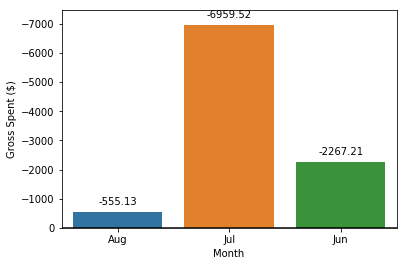

In [39]:
example.monthly_bar_plot('burn')

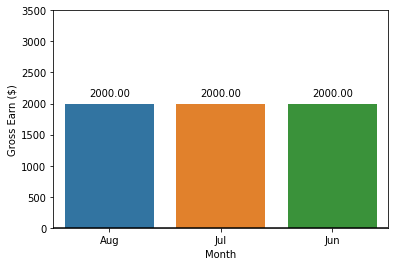

In [40]:
example.monthly_bar_plot()